In [2]:
import pandas as pd
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

import numpy as np
from sklearn import metrics

from sklearn.metrics import roc_auc_score


In [4]:
data = pd.read_csv('data/train_data_for_all_1s.csv')
data

,id,cancel,ni.age,len.at.res,premium,ni.marital.status,n.adults,n.children,tenure,claim.ind,...,sales.channel.lower_phone,coverage.type.lower_a,coverage.type.lower_b,coverage.type.lower_c,dwelling.type.lower_condo,dwelling.type.lower_house,dwelling.type.lower_tenant,credit.lower_high,credit.lower_low,credit.lower_medium
0,1,0,37.0,18.000000,950.507336,0.0,2.0,0.0,15.0,0.0,...,0,0,0,1,0,0,1,1,0,0
1,2,0,40.0,17.000000,909.346046,1.0,5.0,0.0,15.0,0.0,...,0,1,0,0,1,0,0,0,0,1
2,3,0,45.0,14.000000,897.084502,0.0,1.0,0.0,14.0,0.0,...,1,1,0,0,0,1,0,1,0,0
3,4,0,45.0,24.366136,979.039007,0.0,5.0,0.0,22.0,1.0,...,1,1,0,0,0,1,0,1,0,0
4,5,0,36.0,16.000000,932.379027,1.0,2.0,4.0,4.0,0.0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010097,1048571,0,74.0,20.000000,926.857762,0.0,3.0,0.0,19.0,0.0,...,0,1,0,0,0,1,0,1,0,0
1010098,1048572,0,44.0,14.000000,968.546580,0.0,4.0,0.0,14.0,0.0,...,0,1,0,0,1,0,0,1,0,0
1010099,1048573,0,63.0,18.000000,838.446947,1.0,4.0,1.0,12.0,0.0,...,0,1,0,0,0,1,0,1,0,0
1010100,1048574,0,22.0,11.000000,1026.261620,1.0,1.0,1.0,0.0,1.0,...,0,0,0,1,0,1,0,1,0,0


In [23]:
trainX, testX, trainy, testy = train_test_split(data[['id','cancel','ni.age','len.at.res','premium','ni.marital.status','n.adults','n.children','tenure','claim.ind','ni.gender.lower_f','ni.gender.lower_m','sales.channel.lower_broker','sales.channel.lower_online','sales.channel.lower_phone','coverage.type.lower_a','coverage.type.lower_b','coverage.type.lower_c','dwelling.type.lower_condo','dwelling.type.lower_house','dwelling.type.lower_tenant','credit.lower_high','credit.lower_low','credit.lower_medium']],data['cancel'], test_size=0.5, random_state=2, stratify=data['cancel'])

In [24]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

In [25]:
lr_auc = roc_auc_score(testy, yhat)

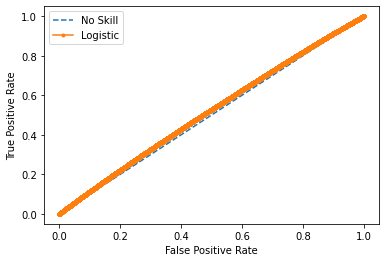

In [27]:
# roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import argmax

fpr, tpr, thresholds = roc_curve(testy, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [28]:
fpr, tpr, thresholds = roc_curve(testy, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.295340


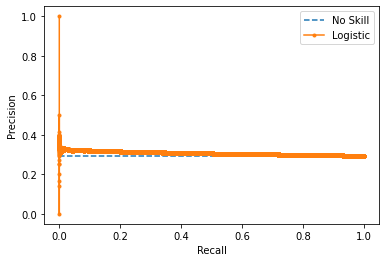

In [30]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

precision, recall, thresholds = precision_recall_curve(testy, yhat)

no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [31]:
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.354941, F-Score=nan


/var/folders/4b/z0w6x5_n59g_x_9s3qnbx_p80000gn/T/ipykernel_3441/2799402972.py:1: RuntimeWarning: invalid value encountered in true_divide
  fscore = (2 * precision * recall) / (precision + recall)


Best Threshold=0.354941, F-Score=nan


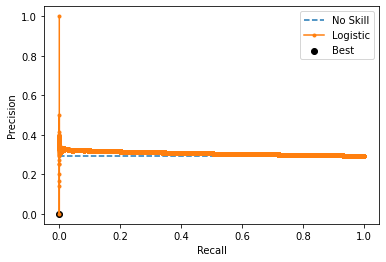

In [32]:
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()